In [1]:
from pathlib import Path
data_path = Path("../data").resolve()
book_list = {"唐家三少":["斗罗大陆", "斗罗大陆II绝世唐门", "酒神"],
             "天蚕土豆":["斗破苍穹", "武动乾坤", "大主宰", "魔兽剑圣异界纵横"],
             "猫腻":["庆余年", "间客", "将夜", "朱雀记", "择天记"]
             }

# 数据集生成
## 1. 生成 datapoints.

1. 方法一：固定 X (10) 个 sentence (comma separated)，删除 outlier.
2. 方法二 (Optional, TODO later)：按照 sentence (comma, dot separated), 直到长度即将超过 N (200,300).
3. 方法三 (Optinal): 按照分词模式进行.

In [3]:
from dataset import generate_paragraph

In [4]:
book = data_path/"唐家三少"/"斗罗大陆.txt"
text = book.read_text()[:10000]
for para in generate_paragraph(text):
    print(para)

光之子外篇暗夜精灵（上）[SEP]夜云在站在古树下静静的站着，[SEP]这株古树在精灵森林中已经有数千年的历史了，[SEP]树高近百米，[SEP]枝叶茂盛，[SEP]给这片精灵森林中的生物们带来了勃勃生机，[SEP]它，[SEP]也是暗夜精灵族领地中最高的一株大树。[SEP]夜云轻轻拍打着自己背后那近乎透明的黑色翅膀，[SEP]眼中流露出一丝淡淡的担忧。
眼中流露出一丝淡淡的担忧。[SEP]他是暗夜精灵族中的一员，[SEP]暗夜精灵王之子，[SEP]拥有着近乎完美的容貌和冷俊的气质。[SEP]精灵族的普遍身高本应是比人类矮一些的，[SEP]但他却是个例外，[SEP]竟然有一米八的海拔，[SEP]除了尖尖的耳朵和背后那对翅膀以外，[SEP]几乎和人类没有什么不同。[SEP]由于暗夜精灵一般都喜欢晚上才外出活动，
由于暗夜精灵一般都喜欢晚上才外出活动，[SEP]所以夜云的皮肤显得异常白皙，[SEP]如同女人般的白皙。[SEP]“阿云，[SEP]我就知道你又跑到这里来了。”[SEP]一个温柔的声音在夜云耳边响起，[SEP]即使不用回首，[SEP]他也知道来人是谁。[SEP]轻叹道：“雨，[SEP]我想一个人静一静，
我想一个人静一静，[SEP]好么？”[SEP]夜雨是他的族人，[SEP]从小一起长大的玩伴，[SEP]也是他最好的朋友。[SEP]黑色的身影一闪，[SEP]在夜云面前多了一名绝美的精灵，[SEP]她眼中满是关切和温柔之色，[SEP]长长的黑发飘散在背后，[SEP]手里握着一张黑色的短弓，
手里握着一张黑色的短弓，[SEP]精致的五官搭配的如此和谐，[SEP]如白玉般的肌肤引人暇思。[SEP]身材娇小的她拍动着翅膀漂浮在半空中使自己可以和夜云对视，[SEP]轻叹道：“阿云，[SEP]你又何必多做担心呢？[SEP]我们暗夜精灵族早已经每况愈下，[SEP]这是早晚要发生的事。[SEP]不过，[SEP]我真的不想离开咱们的家园。”
我真的不想离开咱们的家园。”[SEP]说着，[SEP]她缓缓低下了头，[SEP]美眸中流露出一丝哀伤。[SEP]夜云英俊的面庞突然激动起来，[SEP]他紧紧握住自己的双拳，[SEP]恨恨的说道：“不，[SEP]我一定不会让他们得逞的，[SEP]死也不会。[SEP]这里是我们的家园，
这里是我们的家园，[SEP]没有谁能赶我们走。”[SEP]

In [5]:
datapoint_list = []
for author in book_list:
    author_dir = data_path/author
    for book in book_list[author]:
        book_file = author_dir/"{}.clean.txt".format(book)
        text = book_file.read_text(encoding="utf-8")
        for paragraph in generate_paragraph(text):
            datapoint = {"author":author,
                         "book":book,
                         "text":paragraph
                        }
            datapoint_list.append(datapoint)


In [6]:
datapoints_len = [len(x["text"])-len("[SEP]")*9 for x in datapoint_list]
sorted_datapoints = sorted(zip(datapoint_list, datapoints_len), key=lambda x: x[1], reverse=True)

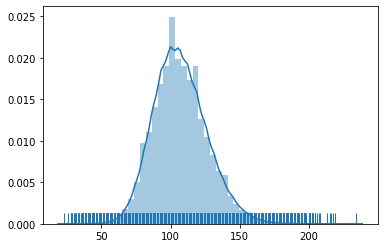

In [7]:
import seaborn as sns
sns.distplot(datapoints_len, rug=True)

In [8]:
import numpy as np
def show_list_stat(lst):
    quantile01 = np.quantile(lst, 0.001)
    quantile1 = np.quantile(lst, 0.01)
    quantile10 = np.quantile(lst, 0.1)
    median = np.median(lst)
    quantile90 = np.quantile(lst, 0.9)
    quantile99 = np.quantile(lst, 0.99)
    quantile999 = np.quantile(lst,0.999)
    quantile9999 = np.quantile(lst,0.9999)
    print("0.1% Quantile =\t\t {}\n1% Quantile =\t\t {}\n10% Quantile =\t\t {}\n"
          "Median =\t\t {}\n90% Quantile =\t\t {}\n99% Quantile =\t\t {}\n99.9% Quantile"
          " =\t {}\n99.99% Quantile =\t {}".format(quantile01,
        quantile1, quantile10, median, quantile90, quantile99, quantile999, quantile9999))

In [9]:
show_list_stat(datapoints_len)

0.1% Quantile =		 54.0
1% Quantile =		 67.0
10% Quantile =		 83.0
Median =		 106.0
90% Quantile =		 132.0
99% Quantile =		 157.0
99.9% Quantile =	 176.0
99.99% Quantile =	 194.0


In [10]:
# Very long sequences
import random
random.choice(sorted_datapoints[:10])

({'author': '猫腻',
  'book': '间客',
  'text': '承受痛苦的能力异常强悍可面对着这股力量,[SEP]竟忍不住痛苦地闷哼了一声。[SEP]手腕间那根手指吐出的力量骤然炸开就像垂成了无数把滚烫的刀,[SEP]在身体内那此神寿力量涌诺内肆意割切一种精神上的血淋淋感觉,[SEP]一种身体内部难以承受的嫩肉撕裂感令他年臂上的汗毛狠狠竖[SEP]如果任由这股力量侵蚀割切或许那火他妾练多年,[SEP]却知其然不知其所以然的神奇线条,[SEP]在下一外便会十十断型。[SEP]许乐对这方面没有太多认知但那和丰骨悚然的危机感,[SEP]下意识里催动腰后椎骨旁的肌肉群猛然柚拯灼热的力量骤然爆,'},
 219)

In [11]:
# Very short sequences
random.choice(sorted_datapoints[-400:])

({'author': '猫腻',
  'book': '择天记',
  'text': '难以成句,[SEP]充满了恐惧与绝望:"妖……[SEP]妖……[SEP]女……[SEP]血……[SEP]血里有……[SEP]毒![SEP]说完这句话,[SEP]他就死了。[SEP]落阳宗长老,'},
 51)

In [12]:
len(sorted_datapoints)

427375

In [13]:
datapoint_list_new = [x for x in datapoint_list if len(x["text"])-len("[SEP]")*9 > 60]

In [14]:
len(datapoint_list_new)

425975

In [2]:
import json
datapoints_file = data_path/"data.json"
with datapoints_file.open(mode="r") as f:
    datapoints = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '/srv/node/sdb1/hxw/pycharm_deployment/proj_dl/data/data.json'

In [86]:
datapoints == datapoint_list_new

True

## 2. Build Vocabulary
### 2.1 Try BERT tokenizer

reference: https://github.com/huggingface/transformers#installation

In [2]:
from transformers import BertTokenizer, BertModel

In [7]:
tokenizer = BertTokenizer.from_pretrained("bert-base-chinese")

In [8]:
text = "无数橘子同时朝着……霍雨浩那看着有些扭曲的身影飞去,[SEP]而在她身边那名英俊青年却是双手抬起,[SEP]接连六个六边形暗金sè的小盒子甩出,[SEP]一面暗金sè光幕将他们四人全部保护在内,[SEP]而且正是在霍雨浩释放出的那一圈白sè光晕尚未抵达之前。[SEP]四人也在同时释放他们的武魂,[SEP]强大的魂导器也需要足够的魂力来催动才能发挥出最大的作用。[SEP]娇小少女肩膀上骤然出现了一个和她身材极不成比例的巨大炮管,[SEP]这炮管比当初和菜头用的雷霆巨炮还要大上几分,[SEP]看上去分量也应该不轻才对。"
text_toks = tokenizer.tokenize(text)

In [9]:
len(text_toks)

221

In [10]:
len(text)

260

In [118]:
text_toks[:100]

['无',
 '数',
 '橘',
 '子',
 '同',
 '时',
 '朝',
 '着',
 '[UNK]',
 '[UNK]',
 '霍',
 '雨',
 '浩',
 '那',
 '看',
 '着',
 '有',
 '些',
 '扭',
 '曲',
 '的',
 '身',
 '影',
 '飞',
 '去',
 ',',
 '[SEP]',
 '而',
 '在',
 '她',
 '身',
 '边',
 '那',
 '名',
 '英',
 '俊',
 '青',
 '年',
 '却',
 '是',
 '双',
 '手',
 '抬',
 '起',
 ',',
 '[SEP]',
 '接',
 '连',
 '六',
 '个',
 '六',
 '边',
 '形',
 '暗',
 '金',
 '[UNK]',
 '的',
 '小',
 '盒',
 '子',
 '甩',
 '出',
 ',',
 '[SEP]',
 '一',
 '面',
 '暗',
 '金',
 '[UNK]',
 '光',
 '幕',
 '将',
 '他',
 '们',
 '四',
 '人',
 '全',
 '部',
 '保',
 '护',
 '在',
 '内',
 ',',
 '[SEP]',
 '而',
 '且',
 '正',
 '是',
 '在',
 '霍',
 '雨',
 '浩',
 '释',
 '放',
 '出',
 '的',
 '那',
 '一',
 '圈',
 '白']

In [4]:
bert_model = BertModel.from_pretrained("bert-base-chinese")

In [5]:
bert_model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(21128, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

### 2.2 Build Customized vocabulary